# Tervetuloa Kemiaa Koodaamalla työpajaan!

### Tarina I 
_Olet kemisti suuren lääkefirman laboratoriossa. Tehtävänäsi on löytää lääkeyhdisteitä, joiden piirteet ovat vertailtavissa aspiriiniin. Erityisesti vesiliukoisuus on merkityksellinen, koska lääkeyhdisteen halutaan liukenevan hyvin vereen. Lääkeyhdisteen biologinen vaikutus ja metabolia voidaan mallintaa myöhemmin._

_Olet tutkinut jo monta erilaista lupaavaa lääkeyhdistettä tuloksetta laboratoriossa vaativilla liukoisuuskokeilla, jotka riippuvat liuosten happamuudesta ja lämpötilasta. Määräaika viimeistellä projektin liukoisuuskokeet häämöttää, siis on keksittävä uusia tapoja määritellä yhdisteiden otannasta ne parhaimmat mahdolliset lääkeyhdisteet jatkotutkimuksia ja kokeellisuutta varten._

_Onneksi sinulla on pääsy erilaisiin laboratoriotuloksiin ja mallinnustyökaluihin, joita ohjelmistokehittäjät farmasiassa ja kemiassa ovat uurastaneet omana tieteenhaaranaan jo vuosikymmeniä. On aika sukeltaa kemian informatiikan tai keminformatiikan maailmaan, ja ratkaista vesiliukoisuuskokeet ennen määräaikaa!_


## Tekniset ohjeet

Tässä työssä työskennellään Jupyter Notebookissa. Tämä notebook on ympäristö, joka sisältää soluja, jotka tekevät sen lukemisesta **modulaarisen**. Tämä modulaarisuus tarkoittaa sitä, että tietokone lukee jokaisen solun yksin, mutta ylhäältä alaspäin järjestyksessä. Solut voidaan jakaa kahteen tyyppiin tässä työohjeessa:

- Koodisoluihin, joihin voidaan kirjoittaa komentoja. Usein ennen tätä ne lataavat erilaisia kirjastoja, mitä hyödyntää komentojen ja prosessien tekemiseen.
- Markdown language -soluihin, joissa on tekstiä, jota voidaan muotoilla kuten tekstieditorissa, mutta tietyillä **komennoilla** erilaisia merkkejä joko ennen tai molemmin puolin sanaa.

Tehtävät. Voit muokata kaikkia soluja kaksoisklikkaamalla solua ja kirjoittaa riveille komentoja tai siirtää kopioitua tekstiä niille -komennolla. Voit ajaa jokaisen solun, ja täten nähdä muutoksesi vaikutuksen painamalla: **CTRL + ENTER**

Jos kohtaat teknisiä ongelmia, kuten jokin solu ei toimi, tämä voi johtua, että olet ajanut sen eri järjestyksessä kuin normaalisti. Pyri ajamaan soluja ylähäältä alaspäin. Jos ongelma ei johdu tästä, käytä tallenna komentoa ja paina tämän jälkeen **CTRL + SHIFT + R**. Tämä  nollaa notebookin. Vaihtoehtoisesti voit ajaa komennon 'Restart the kernel' yläpalkistosta.


**Taulukko 1.** SMILES-säännöt erilaisilla esimerkeillä.
| Symboli | Esim. | Selitys |
| --- | --- | --- |
| Kemiallinen merkki | `O` | Kyseessä on molekyyli, vesi. Alkuaineet ilmaistaan kemiallisina merkkeinä, kuten jaksollisessa järjestelmässä. Vetyjä ei ilmoiteta vaan ne tulkitaan automaattisesti osaksi yhdistettä perustuen alkuaineen tyypilliseen valenssiin, eli sidosten lukumäärään. Katso koodista miten ne saadaan näkyviin |
| Kovalenttinen sidos | `C=C` | Yksinkertaisia sidoksia ei esitetä, mutta kaksois- ja kolmoissidokset esitetään = ja # symbolein |
| Vedyt | `C` | Merkitään vain kiraalisuuden määrittämisessä, C vastaa metaania eli CH4:sta |
| Haarat | `CCCC(C)CC` | Sulut () ilmoittavat haaran ja suluissa ilmoitetaan mikä haara on kyseessä  |
| Rengasrakenne | `C1CCCCC1` tai `C1CCC(C(C1)Cl)Cl` | Numerot 1-9 ilmoittavat atomin sijainnin rengasrakenteessa. Vedyt korvanneet substituentit voidaan laittaa sulkuihin. HUOM. Cl on kloori-atomi|
| Aromaattisuus | `c1ccccc1` | Rengasrakenteen kiraalisuus voidaan esittää vaihtamalla kirjaimet pieniksi |
| Kiraalisuus | `C[C@@H](C(=O)O)N`  | L-alaniini, jossa @@ hiilen jälkeen osoittaa sen kiraaliseksi |
| Isotoopit | `[13C]` | C13-isotoopeista koostuva etaanimolekyyli. Numerot ennen alkuainemerkkiä osoittavat isotoopin |
| Sähköinen varaus ja radikaalit | `[NH4+].[Cl-]` tai `C[CH2].[CH3]`  | Varaus + tai -, ja radikaalit usein luetaan erityisillä algoritmeilla ohjelmistoissa, jotka tulkitsevat SMILES-merkkijonoja. Niille ei ole vakiintunutta merkintää  |

### Testataan yhdisteiden piirtämistä SMILE:ssien avulla

In [ ]:
# Testaa taulukon SMILES-merkkijonoja tällä koodisolulla. Samalla voit tutustua siihen, mitä esitietoja koodi tarvitsee.

from rdkit import Chem
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG

smiles = 'C'  # Voit siirtää haluamasi SMILES-merkkjonon '-merkkien väliin. Paina lopuksi CTRL + ENTER
m = Chem.MolFromSmiles(smiles)
# m = Chem.AddHs(m) # Voit tällä komennolla visualisoida kaikki vedyt, jos haluat. Poista ensimmäinen #-merkki aktivoidaksesi asetuksen
def moltosvg(mol, molSize=(350, 300), kekulize=True):
    mc = Chem.Mol(mol.ToBinary())
    if kekulize:
        try:
            Chem.Kekulize(mc)
        except:
            mc = Chem.Mol(mol.ToBinary())
    if not mc.GetNumConformers():
        rdDepictor.Compute2DCoords(mc)
    drawer = rdMolDraw2D.MolDraw2DSVG(molSize[0], molSize[1])
    drawer.DrawMolecule(mc)
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText()
    return svg.replace('svg:', '')

SVG(moltosvg(m))

###  Kysymys 2.
**Minkä yhdisteen piirsit ja mitä funktionaalisia ryhmiä yhdisteellä on?**

## Liitostaulukot
Testataan miten liitostaulukot toimivat. Valitse jokin monimutkaisempi SMILES ja kokeile luoda liitostaulukko sille seuraavan koodin avulla. Voit myös koikeilla useammalle SMILEssille.

In [ ]:
from rdkit import Chem
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG
import numpy as np
import pandas as pd

mol = Chem.MolFromSmiles('C')

d2d = rdMolDraw2D.MolDraw2DSVG(300,300)
d2d.drawOptions().addAtomIndices = True  # Numerointi alkaa tietokoneelle numerosta 0
d2d.DrawMolecules([mol])
d2d.FinishDrawing()
svg = SVG(d2d.GetDrawingText())

num_atoms = mol.GetNumAtoms()
connectivity_matrix = np.zeros((num_atoms, num_atoms), dtype=int)


for bond in mol.GetBonds():
    begin_atom_idx = bond.GetBeginAtomIdx()    
    end_atom_idx = bond.GetEndAtomIdx()
    bond_type = int(bond.GetBondTypeAsDouble())    
    connectivity_matrix[begin_atom_idx][end_atom_idx] = bond_type
    connectivity_matrix[end_atom_idx][begin_atom_idx] = bond_type
    
df = pd.DataFrame(connectivity_matrix)

display(svg, df)

### Stereokemiaa...

In [ ]:
# Tällä koodilla voit esittää streokemiallisia yhdisteitä
# Aluksi mol1 ja mol2 määritellään SMILES:ksi

mol1 = Chem.MolFromSmiles('C/C=C/C') # Huomaa, että tämä toimii vain isomeerisille SMILES-merkkijonoille
mol2 = Chem.MolFromSmiles('C[C@H](O)[C@@H](N)C(O)=O')


d2d = rdMolDraw2D.MolDraw2DSVG(600,280,300,280)
d2d.drawOptions().addStereoAnnotation=True # Komento merkitsee piirrokseen kiraaliset keskukset.
d2d.DrawMolecules([mol1,mol2]) # RDKit pystyy tulostamaan vain kaksi molekyyliä kerrallaan
d2d.FinishDrawing()
SVG(d2d.GetDrawingText())

### Kysymys 3.
**Onko vasemman puolinen molekyyli cis vai transmuotoinen? Montako kiralikeskusta löytyy oikean puolimmaisesta yhdisteestä?**

## PUG-REST menetelmä ja SMILES

Ohjelmistoympäristöön voi tuoda helposti yhdisteitä teettämällä kyselyitä PubChem-palvelimelta. Tämä on erityisen hyödyllistä, kun halutaan nopeasti tuoda tietoa lääkeyhdisteistä ilman hakukoneita luettelemalla haluttuja molekyylejä osaksi koodia. 

Tästä on erityistä hyötyä, kun haluat hakea SMILES-merkkijonoja tietokannasta.

### Esimerkkejä lääkeistä
| Lääkeaine                  | Tuotenimi                                                                                                                    | Kuvaus |
| ----------- | -------------------------- | ---------------------------------------------------------------------------------------------------------------------------- |
| Aspirin                | (Aspinrin)                                           | Maailman käytetyin tulehduskipulääke. Ehkäisee veren hyytymistä, jotekäytetään sydänifarktien ensihoitoon.                                                                                                                                               |
| Ibuprofen              | (Burana)                                             | Tulehduskipulääke.                                                                                                                                                                                                                                       |
| Paracetamol            | (Panadol)                                            | Kipulääke.                                                                                                                                                                                                                                               |
| Morphine                | (Morfiini)                                           | Voimakas kipulääke. Käytetään sairaalahoidossa.                                                                                                                                                                                                          |
| Cortisone	             | (Prednison, Hydrocortison)                           | Kortisonia käytetään esim. astmaan, allergiohin ja ihosairaksien hoitoon. Käytetään hegitysteitse, tablettina sekä voiteena.                                                                                                                             |
| Penicillin V           | (V-Pen)                                              | Antibiotti bakteeri infektioiden hoitoon.                                                                                                                                                                                                                |
| Cetirizine	            | (Heinix)                                             | Antihistamiini allegioiden hoitoon.                                                                                                                                                                                                                      |
| Insulin                | (Lantus)                                             | Hormoni diabeteksen hoitoon.                                                                                                                                                                                                                             |
| Paclitaxel             | (Taxol)                                              | Syöpälääke.                                                                                                                                                                                                                                              |
| Sertraline              | (Zoloft)                                             | Masennuslääke, käytetään myös paniikkihäiriöön ja pakkoireisiin.                                                                                                                                                                                         |


Valitse kolme tutkittavaa lääkeainetta. Voit hyödyntää yllä olevaa taulukkoa. Syötä lääkaineet koodiin!

In [ ]:
import requests
 # Älä muokkaa tätä osuutta koodista. 
def retrieve_names(compound_names):
    pugrest = "https://pubchem.ncbi.nlm.nih.gov/rest/pug"
    pugoper = "property/CanonicalSMILES"
    pugout = "txt"
    results = {}
    for compound_name in compound_names:
        pugin = "compound/name/" + compound_name
        url = f"{pugrest}/{pugin}/{pugoper}/{pugout}"
        response = requests.get(url)
        if response.status_code == 200:
            results[compound_name] = response.text.strip()  # Strip to remove leading/trailing whitespaces
        else:
            results[compound_name] = f"Error: {response.status_code}"
    return results

# Muokkaa alla olevaa koodiriviä. Lisää tähän valitsemasi lääkkeet.
compound_names = ["", "", ""] 
# Muokkaa vain yllä olevaa koodiriviä.

canonical_smiles = retrieve_names(compound_names)
for compound_name, smiles in canonical_smiles.items():
    print(f"Canonical SMILES for {compound_name}: {smiles}")

### Kysymys 4.
**Mitä lääkeaineita valitsit? Ja mitä olivat niiden SMILES?**

### Piirretään seutraavaksi valitsemasi lääkeaineet SMILESseja hyödyntäen.

In [ ]:
from rdkit import Chem 
from rdkit.Chem.Draw import IPythonConsole 
from rdkit.Chem import rdDepictor 
from rdkit.Chem.Draw import rdMolDraw2D 
from IPython.display import SVG 

smiles = '' # Testaa hakujesi tuloksia pistämällä SMILES kerrallaan '' merkkien väliin. 
m = Chem.MolFromSmiles(smiles)
# m = Chem.AddHs(m) # Voit tällä komennolla visualisoida kaikki vedyt, jos haluat. Poista ensimmäinen #-merkki aktivoidaksesi asetuksen

def moltosvg_with_indices(mol, molSize = (350,300), kekulize = True):
    mc = Chem.Mol(mol.ToBinary())
    if kekulize:
        try:
            Chem.Kekulize(mc)
        except:
            mc = Chem.Mol(mol.ToBinary())
    if not mc.GetNumConformers():
        rdDepictor.Compute2DCoords(mc)
    drawer = rdMolDraw2D.MolDraw2DSVG(molSize[0],molSize[1])
    drawer = Chem.Draw.rdMolDraw2D.MolDraw2DSVG(molSize[0], molSize[1])
    drawer.drawOptions().addAtomIndices = True  # Add atom indices
    drawer.DrawMolecule(mc)
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText()
    return svg.replace('svg:','')
    
SVG(moltosvg(m))

### Kysymys 5.
**Mitä funktionaalisia ryhmiä löydät lääkeaineista?**

In [ ]:
# Tällaisella koodilla voit hakea erilaisilla trviaali- tai IUPAC-nimillä tiettyjä tietoja PubChem tietokannasta.

import pubchempy as pcp 
import pandas as pd
pd.options.display.max_colwidth = 1000

names = ["water", "benzene", "methanol", "ethene", "ethanol", "propene", "1-propanol", "2-propanol", "butadiene", "1-butanol", "2-butanol", "tert-butanol"]

# PubChem tietokannan yhdisteet on indeksoitu (ID) ja CID on lyhenne kemialliselle indeksille.
# Ne ovat uniikkeja nimikkeille ja toimivat selkeämpänä perustana haulle SMILES:n tai muitten tietojen sijaan.
compound_ids = [cp.cid for cp in pcp.get_compounds(names, namespace='name')]

compound_ids = []
for name in names:
    try:
        cp = pcp.get_compounds(name, namespace='name')
        if cp:
            compound_ids.append(cp[0].cid)
    except Exception as e:
        print(f"Error retrieving CID for '{name}', : {e}")
results = pcp.get_properties(['IUPACName', 'MolecularFormula', 'MolecularWeight', 'CanonicalSMILES'], compound_ids)
df = pd.DataFrame(results)
display(df)

### Kysymys 6.
**Miten valitsemasi lääkeaineen nimi eroaa IUPAC-nimestä?**

## Tutkimus

In [ ]:
import pandas as pd        # Tuo Pythonin data-analyysi ohjelmiston, Pandasin tai pd ohjelmistoympäristöön
pd.options.display.max_colwidth = 1000
df = pd.read_csv('BP.csv') # lukee tiedoston taulukkona pandas -ohjelmiston avulla.
display(df)                         # tulostaa taulukon, koska määritelty df tarkoittaa dataframe -komentoa.

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df.Moolimassa, df.Kiehumispiste_K)     # Tekee verrannon lämpötilan (K) suhteesta moolimassaa vs molecular weight
plt.xlabel('Moolimassa')
plt.ylabel('Kiehumispiste')
plt.show()

### Kysymys 7.
**Mitä voit päätellä molekyylien kiehumispisteistä ja niiden suhteesta moolimassaan? Miksi sama moolimassa voi johtaa eri kiehumispisteeseen?**

### Regressioanalyysi **Tähän teksti miksi tätä tarvitaan (QSAR)**

Lineeariset sovitukset ovat tuttuja varmasti matematiikan tunneilta. Tämä matemaattinen mallintaminen on yksi keskeisimpiä menetelmiä keminformatiikassa koska sillä voidaan tarkastella erilaisten muuttjien suhdetta toisiinsa (korrelaatio) aloittaen alkaen kahdesta tai usemmasta tekijästä. Alla on koodia, jolla voidaan sovittaa regressiomalli alkaanien ja sykloalkaaninien datasettiin. Mitä huomaat kun koodi tulostaa graafin? 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Lataa dataa .csv tiedostosta taulukoksi
df = pd.read_csv('BP.csv')

# Sovita lineaarinen regressiomalli 
model = LinearRegression()
X = df[['Moolimassa']]  # Feature (independent variable)
y = df['Kiehumispiste_K']  # Target variable (dependent variable)
model.fit(X, y)

# Piirrä  pistekuvio datasta 
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Moolimassa', y='Kiehumispiste_K', data=df, color='blue', label='Datapisteet')

# Piirrä regressiosuora
plt.plot(X, model.predict(X), color='red', label='Lineaarinen regressio')

# Aseta otsikot ja mitat
plt.xlabel('Moolimassa')
plt.ylabel('Kiehumispiste (K)')
plt.title('Lineaarinen regressio malli')

# Show legend
plt.legend()

# Näytä sovitus
plt.show()

### Kysymys 8.
**Seuraako punainen regssio suora datapisteitä tarkasti?**

## Tarina II

Nyt kun olet palauttanut mieliisi keminformatiikan työskentelytapoja on aika hyödyntää alla sijaitsevaa koneoppimisen mallia. 

Pääset hyödyntämään valmista koneoppimisen mallia, joka on koulutettu Delayneyn datasetillä, mutta erilaisilla koneoppimisen menetelmillä. Muistat myös, että olemassa on myös muita koneoppimisen malleja kuten sveitsiläinen SwissADME.

#### SwissADME

http://www.swissadme.ch/ 

#### Tehtäväsi

**Löytää yhdisteitä, joilla on aspiriiniin verrattavissa oleva liukoisuus LogS-arvo -2.1 tutkimalla niitä niin SwissADME ja alla sijaitsevan koneoppimisen mallin avulla.** Tulkitse seuraavan taulukon avulla LogS-arvoja, jotka on siis laskettu Delaynen kaavalla, ja toimivat mittana vesilukoisuudelle.

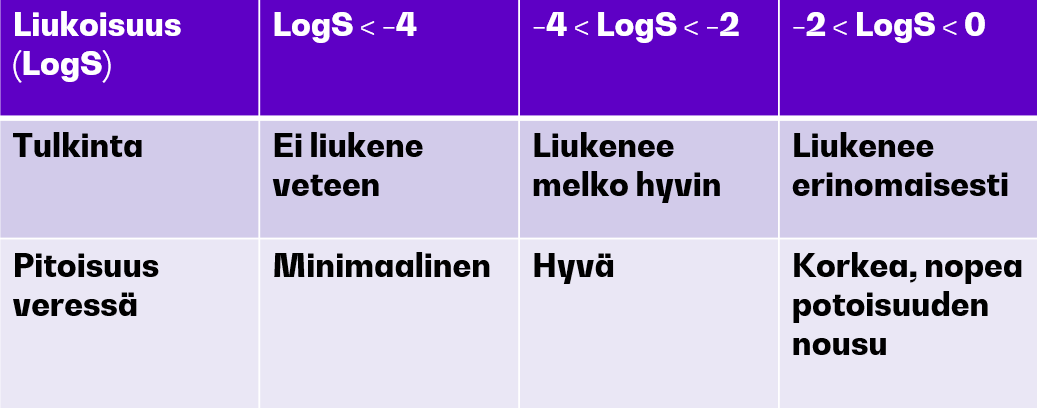

On aika tutkia vähintään 10 yhdistettä aloittamalla niiden SMILES nimistä:

- Voit etsiä tietokantoja joko vapaasti tai PUG-REST -komennoilla
- Piirtää SwissADME:n sivuston piirto-ohjelmistolla aspiriinia muistuttavia rakenteita
- Hyödyntää hyödyntää kokeellista dataa yhdisteistä (taulukko).
- Voit luoda SwissADME:n piirto-ohjelmistolla SMILESja, joita voit myös tuoda tänne.

Arvioi niiden soveltuvuudeltaan lääkeyhdisteiksi erityisesti **liukoisuuden arvon ja Lipinskin viiden säännön suhteen**.

**Tämän työn tarkoitus on kartoittaa pieni otos samaa liukoisuutta omaavista yhdisteistä**, joita esimerkiksi sinä tai muut voivat **hyödyntää lähtökohtana seuraaville keminformatiikan liukoisuusmalleille**. Kaikki lähtee tunnetuista ja varmennetuista datapisteistä! Onnea matkaan!
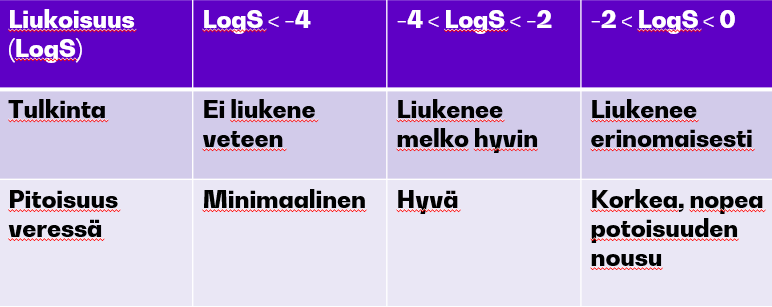

In [ ]:
# Voit esimerkiksi tutkia vastaako mallin arvot kokeellisten tutkimusten tuloksia. Datasetissä on epäonnistuneiden ennusteiden ja oikeiden ennusteiden tuloksia
import numpy as np
import pandas as pd
pd.options.display.max_colwidth = 1000


df = pd.read_csv('kokeellisetLogS_referenssipisteet.csv')
pd.set_option('display.max_rows', 500)
df = df.loc[:100, ['Chemical name', 'LogS exp (mol/L)', 'Test', 'SMILES']]
display(df)

## Koneoppimisen malli

In [ ]:
from pycaret.classification import *

model = load_model("WaterSoulubility_03_01_2024_model")

Käytä tätä koneoppimisen mallia ennustamaan liukoisuutta ja soveltuvuutta lääkeaineiksi! Syötä SMILES-jonoja yhdisteille mitä haluat tutkia, mutta muista erottaa ne pilkulla ja rivinvaihdolla.

In [ ]:
from chem_util import descriptors_from_smiles # syötä hakasulkeiden väliin SMILES-jonoja lainausmerkkien väliin esimerkin mukaisesti
smiles = [                                    #Esimerkiksi seuraavat yhdisteet
  "C1CCCCC1",
  "CC(C)Cc1ccc(cc1)C(C)C(=O)O",
  "CC1(C(N2C(S1)C(C2=O)NC(=O)C(C3=CC=C(C=C3)O)N)C(=O)O)C",
  "CC1=C(C(=O)C(=C(C1=O)OC)OC)CC=C(C)CC\C=C(/C)\CC\C=C(/C)\CC\C=C(/C)\CC\C=C(/C)\CC\C=C(/C)\CC\C=C(/C)\CCC=C(C)C", 
  "F[C@H]1CC[C@H](O)CC1", 
  "C1CC1[C@H](F)C1CCC1", 
  "CC(=O)OC1=CC=CC=C1C(=O)O"]

x = descriptors_from_smiles(smiles) # Koneoppimisen malli hyödyntää molekulaarisiadeskriptoreita laskiessaan kysyttyjä arvoja SMILES:n perusteella
display(x)

### Ennustetaan:

In [ ]:
ennuste = model.predict(x)
df = pd.DataFrame({"Ennustettu LogS": ennuste, "SMILE": smiles})

display(df)

### Kysymys 9.
**???**